In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [2]:
mnist = tf.keras.datasets.mnist
(mnist_x_train, mnist_y_train) , (mnist_x_test, mnist_y_test) = mnist.load_data()
mnist_x_train = tf.keras.utils.normalize(mnist_x_train, axis = 1)
mnist_x_test = tf.keras.utils.normalize(mnist_x_test, axis = 1)

In [59]:
model = tf.keras.models.load_model('mnist_9917.model')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 25, 64)            7232      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 22, 64)            16448     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 128)            32896     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 128)            65664     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
__________

In [57]:
def wrong(data):
    predictions = model.predict(mnist_x_test)
    counter = 0
    for i in range(len(data)):
        if np.argmax(predictions[i]) != data[i]:
            counter += 1
            plt.imshow(mnist_x_test[i], cmap = plt.cm.binary)
            plt.show()
            plt.close()
    print(counter)
    
def predict(filepath):
    IMG_SIZE = 28
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    last_array = tf.keras.utils.normalize(new_array, axis = 1)
    prediction = model.predict([last_array.reshape(-1, IMG_SIZE,IMG_SIZE)])
    print('The number you wrote is: ', np.argmax(prediction))
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.imshow(last_array, cmap='gray_r')
    plt.subplot(122)
    x = np.linspace(0,9,10)
    plt.xticks(x)
    plt.bar(x,list(prediction)[0])
    
def plot_conv_weights(weights):
    w_min = np.min(weights)
    w_max = np.max(weights)
    num_filters = weights.shape[2]
    num_grids = math.ceil(np.sqrt(num_filters))
    fig, axes = plt.subplots(num_grids, num_grids)

    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = weights[:, map([1,1,1,1], zip(*l)), i]
            ax.imshow(img, vmin=w_min, vmax=w_max, interpolation='nearest', cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [ ]:
wrong(mnist_y_test) # Counts and shows all the wrong numbers from mnist-test

The number you wrote is:  3


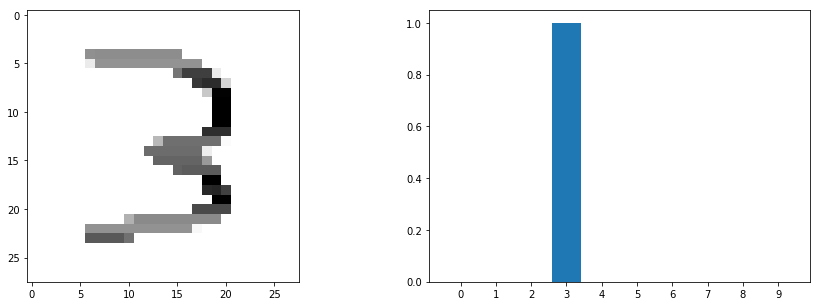

In [5]:
predict('number_3.png')

The number you wrote is:  7


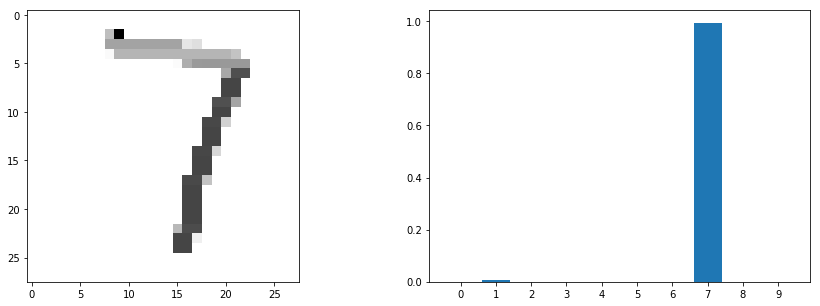

In [6]:
predict('number_7.png')

The number you wrote is:  4


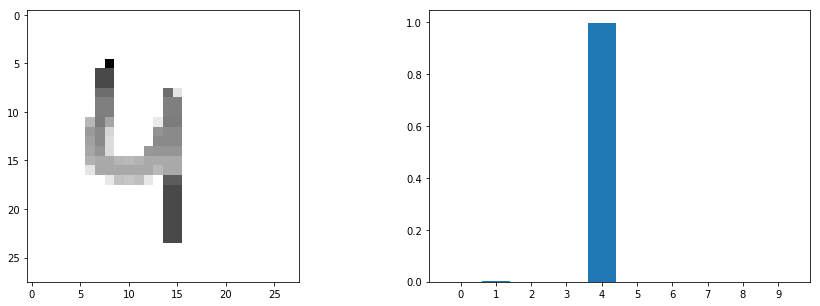

In [47]:
predict('number_4.png')